In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from collections import Counter
compare_list = ["match_score", "artists", "artist_spotify","title",  "title_spotify","year_released"]

In [ ]:


# Read the CSV file, ensuring no extra index is added
df_songs_chart = pd.read_csv('/Users/fynnersatz/Desktop/python/hitster/django/music_game/game/data/raw_de/chart_data_de.csv', index_col=None)
df_songs_spotify = pd.read_csv('/Users/fynnersatz/Desktop/python/hitster/spotify_data_de.csv', index_col=None)
df_songs_spotify['artist_spotify'] = df_songs_spotify['artist_spotify'].apply(ast.literal_eval)
df_songs_spotify['country'] = "de"


df_song = pd.concat([df_songs_chart, df_songs_spotify], axis=1)



In [ ]:
df_song = pd.read_csv('/Users/fynnersatz/Desktop/python/hitster/chart_data_with_spotify_de.csv', index_col=None)

In [ ]:
pd.set_option("display.max_rows", 500)
df_song[~df_song["id_spotify"].isna()].sort_values("match_score", ascending=True).head(100)[compare_list]

In [ ]:
df_song[~df_song["id_spotify"].isna()].sort_values("match_score", ascending=True).hist(column="match_score",bins=100)

In [ ]:
remaining = df_song[(~df_song["id_spotify"].isna())& (df_song["match_score"] < 0.95)]
fixed = df_song[(~df_song["id_spotify"].isna())& (df_song["match_score"] >= 0.95)]
print(len(remaining))
print(len(fixed))

In [ ]:
pd.set_option("display.max_rows", 500)
fixed.sort_values("match_score", ascending=True).head(100)[compare_list]

In [ ]:
pd.set_option("display.max_rows", 600)
remaining.sort_values("match_score")[compare_list].sort_values("match_score", ascending=True).head(400)[compare_list]

In [ ]:
pd.set_option("display.max_rows", 600)
fixed.sort_values("match_score")[compare_list]

## rest

In [ ]:
# Funktion zur Sicherstellung der Gleichheit für Listen oder einfache Werte
def ensure_unique(series, col_name):
    if series.apply(lambda x: isinstance(x, list)).all():  # Prüfen, ob alle Werte Listen sind
        unique_values = series.apply(tuple).unique()  # Listen in Tupel umwandeln für .unique()
    else:
        unique_values = series.unique()
    if len(unique_values) > 1:
        raise ValueError(f"Spalte '{col_name}' hat mehrere unterschiedliche Werte in einer Gruppe: {unique_values}")
    return unique_values[0]

def calculate_points(series, col_name):
    mean = series.mean()
    mean = mean * ((len(series) * 0.1 - 0.1) + 1)
    return mean


In [ ]:
# Aggregationslogik definieren
aggregations_country = {
    "artists": lambda x: x.iloc[0],  # Take the first element of the group
    "artist_spotify": lambda x: ensure_unique(x, "artist_spotify"),
    "title": lambda x: x.iloc[0],   # Take the first element of the group
    "title_spotify": lambda x: ensure_unique(x, "title_spotify"),
    "match_score": lambda x: x.iloc[0],  # Take the first element of the group
    "year_released": lambda x: x.iloc[0],  # Take the first element of the group
    "year_charts": lambda x: x.min() if len(x) == len(set(x)) else ValueError(f"'year_charts' hat doppelte Werte: {x.tolist()}"),
    "points": "sum",
    "pos": "min",
    "max_pos": "min",
    "weeks_top10": "sum",
    "image": lambda x: ensure_unique(x, "image"),
    "country": lambda x: ensure_unique(x, "country"),
}

# Grouping und Aggregation
try:
    # `id_spotify` wird als Index verwendet und anschließend zurückgesetzt
    df_songs_de_sorted = df_songs_de.sort_values(by=["id_spotify", "match_score"], ascending=[True, False])
    df_songs_de = df_songs_de_sorted.groupby("id_spotify").agg(aggregations_country).reset_index()
except ValueError as e:
    print("Fehler bei der Gruppierung:", e)

try:
    # `id_spotify` wird als Index verwendet und anschließend zurückgesetzt
    df_songs_usa_sorted = df_songs_usa.sort_values(by=["id_spotify", "match_score"], ascending=[True, False])
    df_songs_usa = df_songs_usa_sorted.groupby("id_spotify").agg(aggregations_country).reset_index()
except ValueError as e:
    print("Fehler bei der Gruppierung:", e)

In [ ]:
df_songs = pd.concat([df_songs_de, df_songs_usa], axis=0)

In [ ]:
# Aggregationslogik definieren
aggregations_total = {
    "artists": lambda x: x.iloc[0],  # Take the first element of the group
    "artist_spotify": lambda x: ensure_unique(x, "artist_spotify"),
    "title": lambda x: x.iloc[0],   # Take the first element of the group
    "title_spotify": lambda x: ensure_unique(x, "title_spotify"),
    "match_score": lambda x: x.iloc[0],  # Take the first element of the group
    "year_released": lambda x: x.iloc[0],  # Take the first element of the group
    "year_charts": lambda x: x.iloc[0],  # Take the first element of the group
    "points": "sum",
    "pos": "min",
    "max_pos": "min",
    "weeks_top10": "sum",
    "image": lambda x: ensure_unique(x, "image"),
    "country": lambda x: x.iloc[0],  # Take the first element of the group
}
try:
    # `id_spotify` wird als Index verwendet und anschließend zurückgesetzt
    df_songs_sorted = df_songs.sort_values(by=["id_spotify", "year_released", "match_score"], ascending=[True, True, False])
    df_songs_filtered = df_songs_sorted.groupby("id_spotify").agg(aggregations_total).sort_values(["year_released", "points"], ascending=[False, False]).reset_index()
except ValueError as e:
    print("Fehler bei der Gruppierung:", e)

In [ ]:
top_10_p_year = df_songs_filtered.groupby("year_released", group_keys=False).apply(lambda group: group.nlargest(10, "points"))

## Plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_boxplot(df, x_col, y_col, title=None, figsize=(10, 6)):
    """
    Create a box plot from a pandas DataFrame.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    x_col (str): Name of the integer column for x-axis
    y_col (str): Name of the numeric column for y-axis
    title (str, optional): Plot title
    figsize (tuple, optional): Figure size as (width, height)
    """
    # Create figure and axis
    plt.figure(figsize=figsize)
    
    # Create box plot using seaborn
    sns.boxplot(data=df, x=x_col, y=y_col, fli)
    
    # Customize plot
    plt.title(title or f'Box Plot of {y_col} by {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    
    # Rotate x-axis labels if there are many categories
    plt.xticks(rotation=45 if len(df[x_col].unique()) > 10 else 0)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show plot
    plt.show()



In [ ]:
create_boxplot(df_songs_filtered, "year_released", "points")

In [ ]:

df_songs_filtered.groupby(by="year_released").agg({"points": "median"}).plot()

In [ ]:
df_songs_filtered.sort_values("points", ascending=False).head(200).groupby(by="year_released").agg({"points": "median"}).plot()

In [ ]:
df_songs_filtered.hist(column="year_released", bins=len(df_songs_filtered["year_released"].unique()))

## Genre

In [98]:
df_songs = pd.read_csv('/Users/fynnersatz/Desktop/python/hitster/django/music_game/game/data/processed_data/song_data.csv', index_col=None)

array([[<Axes: title={'center': 'match_score'}>]], dtype=object)

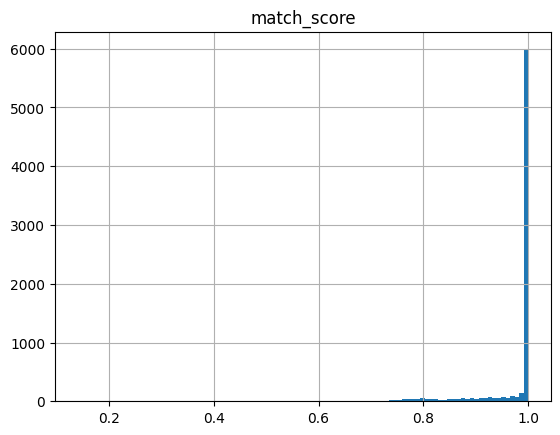

In [102]:
df_songs.hist(column="match_score", bins=100)


In [83]:
df_songs['genre'] = df_songs['genre'].apply(ast.literal_eval)

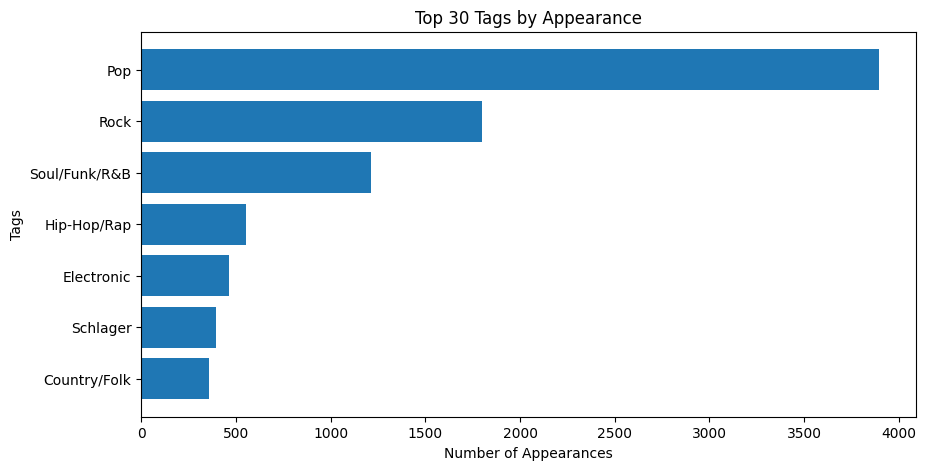

In [86]:
all_tags = [tag for sublist in df_songs['genre'] for tag in sublist]

# Count the frequency of each tag
tag_counts = Counter(all_tags)

# Get the top 30 tags
top_30_tags = tag_counts.most_common(10)

# Convert to a DataFrame for easy plotting
top_30_df = pd.DataFrame(top_30_tags, columns=['Tag', 'Count'])

# Plot the top 30 tags
plt.figure(figsize=(10, 5))
plt.barh(top_30_df['Tag'], top_30_df['Count'])
plt.xlabel('Number of Appearances')
plt.ylabel('Tags')
plt.title('Top 30 Tags by Appearance')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [79]:
# get the tag_counts with more than 100 appearances and sort them by count
top_tags = {tag: count for tag, count in tag_counts.items() if count > 20}
top_tags = dict(sorted(top_tags.items(), key=lambda item: item[1], reverse=True))

In [64]:
df_with_spotify = pd.read_csv('/Users/fynnersatz/Desktop/python/hitster/chart_data_with_spotify_de.csv', index_col=None)
df_with_genre = pd.read_csv('/Users/fynnersatz/Desktop/python/hitster/chart_data_with_genre_de.csv', index_col=None)

df_with_spotify['tags'] = df_with_genre['tags']
df_with_spotify.to_csv('chart_data_with_all_data.csv', index=False)

In [94]:
print(list(top_30_df["Tag"]))

['Pop', 'Rock', 'Soul/Funk/R&B', 'Hip-Hop/Rap', 'Electronic', 'Schlager', 'Country/Folk']
